In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
from pathlib import Path
import glob
import pandas as pd

OUTPUT_DIR = Path("/work/smt4/thulke/vieweg/SER/Code/sisyphus/output")
PLOT_FOLDER = Path("/work/smt4/thulke/vieweg/SER/Code/plots")

sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="deep",
    rc={"text.usetex": True},
    font="Computer Modern",
    font_scale=1.2,
)

In [17]:
datas = []
for path in map(Path, glob.glob(f"{OUTPUT_DIR}/**/loss.csv", recursive=True)):
    print(path)
    data = pd.read_csv(path)
    if path.parts[-4] == "rav":
        data["Corpus"] = "RAVDESS"
    else:
        data["Corpus"] = "IEMOCAP"

    data["exp"] = path.parts[-3]
    data = data.rename(
        columns={"loss": "Loss $\mathcal L$", "kind": "Split", "epoch": "Epoch"}
    )
    datas.append(data)
data = pd.concat(datas, ignore_index=True)
data

/work/smt4/thulke/vieweg/SER/Code/sisyphus/output/rav/lj_finetune_facebook_wav2vec2-base-960h/training/loss.csv
/work/smt4/thulke/vieweg/SER/Code/sisyphus/output/rav/lj_finetune_jonatasgrosman_wav2vec2-large-xlsr-53-english/training/loss.csv
/work/smt4/thulke/vieweg/SER/Code/sisyphus/output/rav/lj_featureextract_facebook_wav2vec2-base-960h/training/loss.csv
/work/smt4/thulke/vieweg/SER/Code/sisyphus/output/rav/yuan/training/loss.csv
/work/smt4/thulke/vieweg/SER/Code/sisyphus/output/rav/lj_featureextract_jonatasgrosman_wav2vec2-large-xlsr-53-english/training/loss.csv
/work/smt4/thulke/vieweg/SER/Code/sisyphus/output/iem/lj_featureextract_facebook_wav2vec2-base-960h/training/loss.csv
/work/smt4/thulke/vieweg/SER/Code/sisyphus/output/iem/lj_finetune_jonatasgrosman_wav2vec2-large-xlsr-53-english/training/loss.csv
/work/smt4/thulke/vieweg/SER/Code/sisyphus/output/iem/yuan/training/loss.csv
/work/smt4/thulke/vieweg/SER/Code/sisyphus/output/iem/lj_finetune_facebook_wav2vec2-base-960h/training

,Epoch,Loss $\mathcal L$,Split,Corpus,exp
0,0.12,2.080000,Training,RAVDESS,lj_finetune_facebook_wav2vec2-base-960h
1,0.24,2.099100,Training,RAVDESS,lj_finetune_facebook_wav2vec2-base-960h
2,0.36,2.076900,Training,RAVDESS,lj_finetune_facebook_wav2vec2-base-960h
3,0.47,2.057400,Training,RAVDESS,lj_finetune_facebook_wav2vec2-base-960h
4,0.59,2.115900,Training,RAVDESS,lj_finetune_facebook_wav2vec2-base-960h
...,...,...,...,...,...
3247,138.87,1.039194,Validation,IEMOCAP,lj_featureextract_jonatasgrosman_wav2vec2-larg...
3248,141.65,1.041788,Validation,IEMOCAP,lj_featureextract_jonatasgrosman_wav2vec2-larg...
3249,144.43,1.046146,Validation,IEMOCAP,lj_featureextract_jonatasgrosman_wav2vec2-larg...
3250,147.22,1.052213,Validation,IEMOCAP,lj_featureextract_jonatasgrosman_wav2vec2-larg...


lj_finetune_facebook_wav2vec2-base-960h


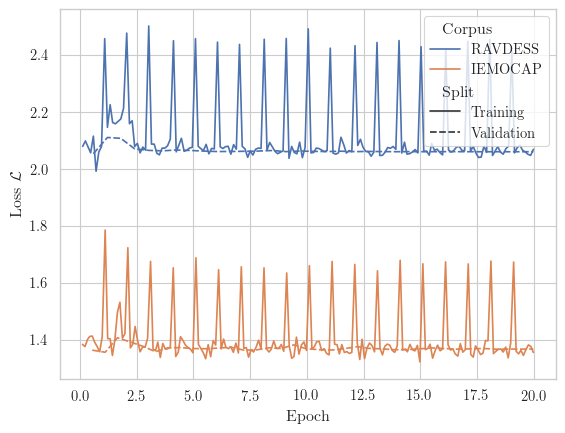

lj_finetune_jonatasgrosman_wav2vec2-large-xlsr-53-english


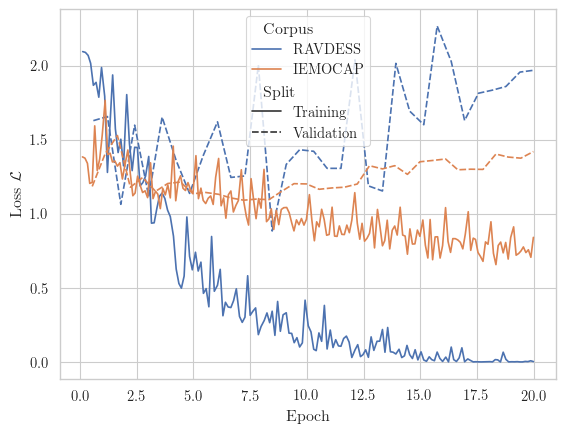

lj_featureextract_facebook_wav2vec2-base-960h


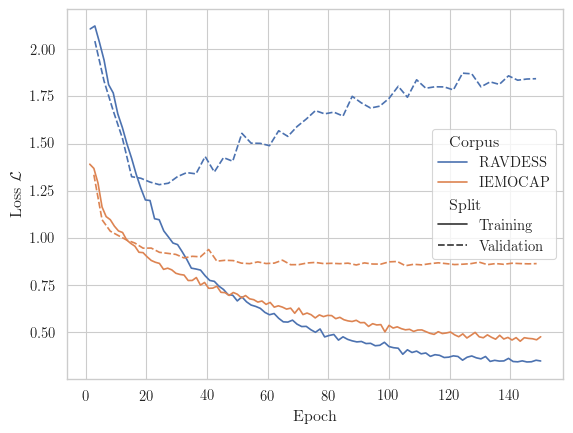

yuan


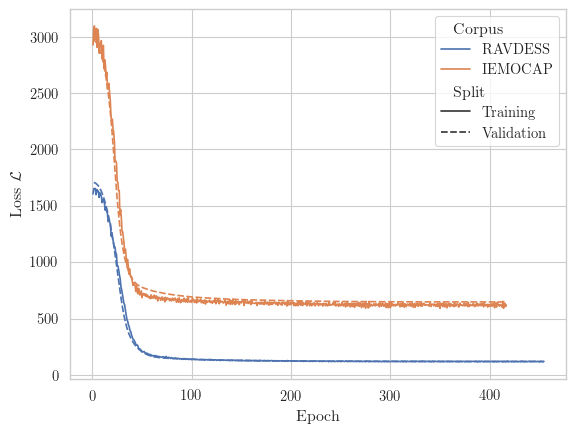

lj_featureextract_jonatasgrosman_wav2vec2-large-xlsr-53-english


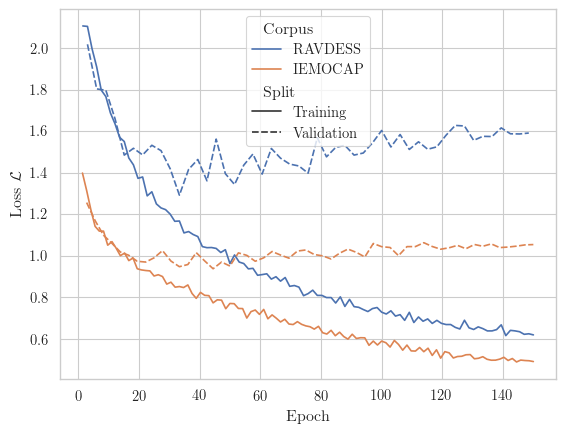

In [18]:
for exp in data.exp.unique():
    print(exp)
    data_filtered = data.query("exp == @exp")
    sns.lineplot(
        data_filtered,
        x="Epoch",
        y="Loss $\mathcal L$",
        style="Split",
        hue="Corpus",
        estimator=None,
    )
    plt.savefig(PLOT_FOLDER / f"{exp}_loss.svg")
    plt.show()

In [19]:
datas = []
for path in map(Path, glob.glob(f"{OUTPUT_DIR}/**/lr.csv", recursive=True)):
    print(path)
    data = pd.read_csv(path)
    if path.parts[-4] == "rav":
        data["Corpus"] = "RAVDESS"
    else:
        data["Corpus"] = "IEMOCAP"

    data["exp"] = path.parts[-3]
    data = data.rename(
        columns={
            "learning_rate": "Learning Rate $\eta$",
            "kind": "Split",
            "epoch": "Epoch",
        }
    )
    datas.append(data)
data = pd.concat(datas, ignore_index=True)
data

/work/smt4/thulke/vieweg/SER/Code/sisyphus/output/rav/lj_finetune_facebook_wav2vec2-base-960h/training/lr.csv
/work/smt4/thulke/vieweg/SER/Code/sisyphus/output/rav/lj_finetune_jonatasgrosman_wav2vec2-large-xlsr-53-english/training/lr.csv
/work/smt4/thulke/vieweg/SER/Code/sisyphus/output/rav/lj_featureextract_facebook_wav2vec2-base-960h/training/lr.csv
/work/smt4/thulke/vieweg/SER/Code/sisyphus/output/rav/yuan/training/lr.csv
/work/smt4/thulke/vieweg/SER/Code/sisyphus/output/rav/lj_featureextract_jonatasgrosman_wav2vec2-large-xlsr-53-english/training/lr.csv
/work/smt4/thulke/vieweg/SER/Code/sisyphus/output/iem/lj_featureextract_facebook_wav2vec2-base-960h/training/lr.csv
/work/smt4/thulke/vieweg/SER/Code/sisyphus/output/iem/lj_finetune_jonatasgrosman_wav2vec2-large-xlsr-53-english/training/lr.csv
/work/smt4/thulke/vieweg/SER/Code/sisyphus/output/iem/yuan/training/lr.csv
/work/smt4/thulke/vieweg/SER/Code/sisyphus/output/iem/lj_finetune_facebook_wav2vec2-base-960h/training/lr.csv
/work/sm

,Epoch,Learning Rate $\eta$,Corpus,exp
0,0.12,0.000080,RAVDESS,lj_finetune_facebook_wav2vec2-base-960h
1,0.24,0.000160,RAVDESS,lj_finetune_facebook_wav2vec2-base-960h
2,0.36,0.000240,RAVDESS,lj_finetune_facebook_wav2vec2-base-960h
3,0.47,0.000320,RAVDESS,lj_finetune_facebook_wav2vec2-base-960h
4,0.59,0.000400,RAVDESS,lj_finetune_facebook_wav2vec2-base-960h
...,...,...,...,...
2302,144.43,0.000041,IEMOCAP,lj_featureextract_jonatasgrosman_wav2vec2-larg...
2303,145.81,0.000031,IEMOCAP,lj_featureextract_jonatasgrosman_wav2vec2-larg...
2304,147.22,0.000020,IEMOCAP,lj_featureextract_jonatasgrosman_wav2vec2-larg...
2305,148.60,0.000010,IEMOCAP,lj_featureextract_jonatasgrosman_wav2vec2-larg...


lj_finetune_facebook_wav2vec2-base-960h


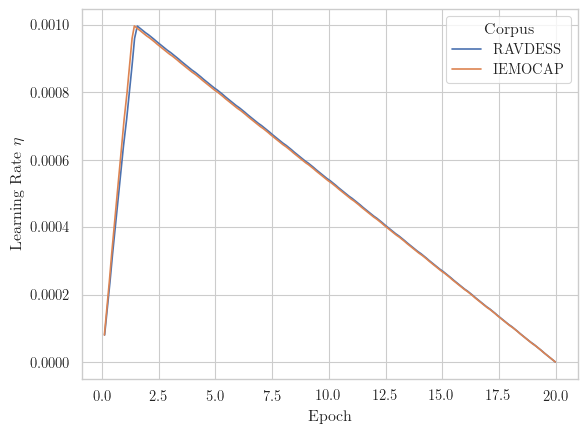

lj_finetune_jonatasgrosman_wav2vec2-large-xlsr-53-english


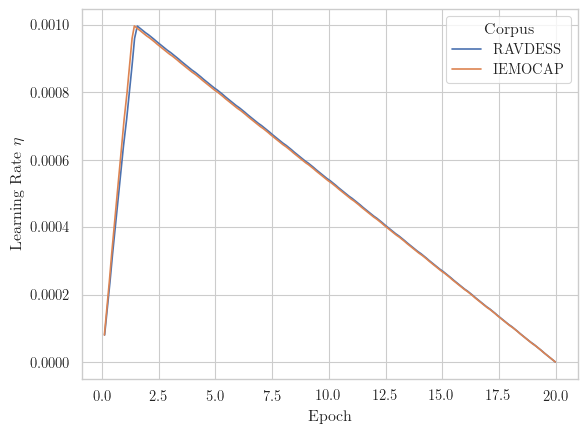

lj_featureextract_facebook_wav2vec2-base-960h


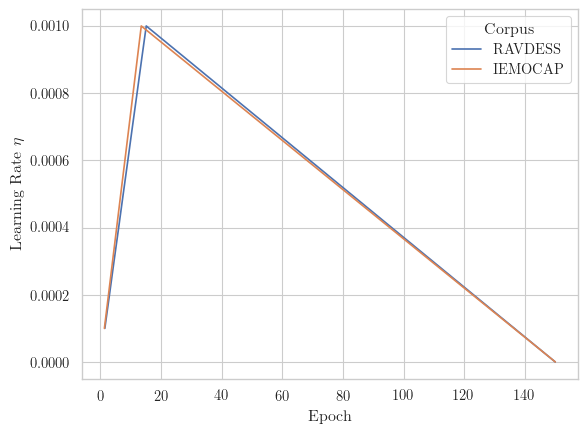

yuan


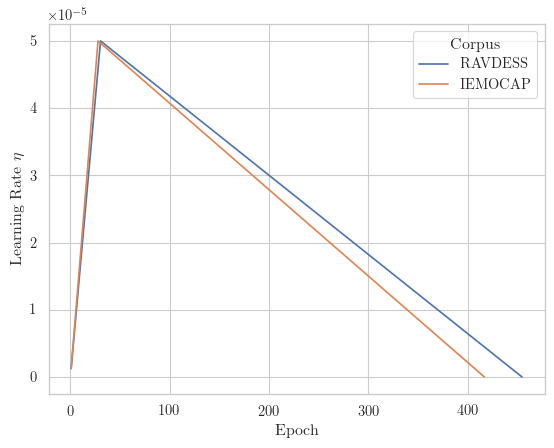

lj_featureextract_jonatasgrosman_wav2vec2-large-xlsr-53-english


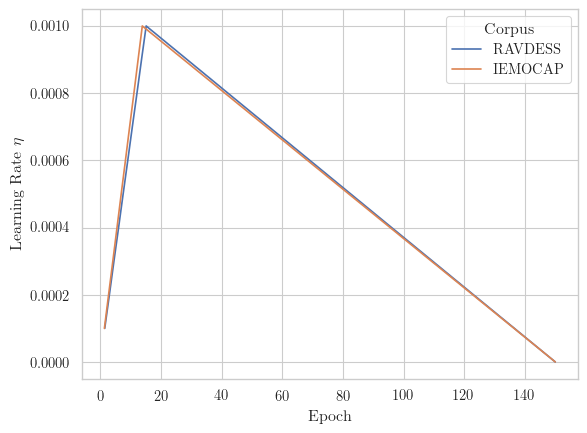

In [20]:
for exp in data.exp.unique():
    print(exp)
    filter_data = data.query("exp == @exp").drop(columns="exp")
    plot = sns.lineplot(
        data=filter_data,
        x="Epoch",
        y="Learning Rate $\eta$",
        hue="Corpus",
        estimator=None,
    )
    plt.savefig(PLOT_FOLDER / f"{exp}_lr.svg")
    plt.show()